# Remote Sensing

<img src="images/logo.png"  width=900/>

## Definition

- “Remote Sensing is the use of electromagnetic radiation sensors to record images of the environment, which can be interpreted to yield useful information“ (Curran 1985)


- Detection or recording of objects from a distance, without direct contact of the recording system, the so-called sensor, with the object to be explored (Kronberg 1985)

## Why remote sensing?

| Pro | Con   |
|------|------|
|   Large coverage  | table|
|Comprehensive coverage (without gaps)|Expensive (development, launch)|
|Physical measurements even in hardly accessible region|Technological limitations (z.B. SNR)
|
|Regular orbit (repeated acquisitions)|Complex data processing (usually automized)|
|Objective measurements|Indirect measurements (models, e.g., spectral indices as proxy of vegetation cover)|
|High degree of automation||
|Archiving function (“memory”)||
|Cheap (operation)||
|many applications not possible with field recordings (alone)||

## Fields of applications

<img src="images/rs_fields.png"  width=900/>

## Raster data in Python

Raster data sets such as aerial photographs, satellite images or digital elevation models are structured similarly to a matrix. The individual image points (i.e. pixels) are organized in rows and columns and each have a numerical value, which is converted into a color or brightness value for display

<img src="images/raster-concept.png"  width=900/>

<right>
<sub><sup>
Source: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/
</sup></sub>
<right>

### Data sources

**Global Forest Change, University of Maryland**<br>
This data is derived from satellite imagery, from which the amount of forest cover each year everywhere on the planet is calculated.<br>
https://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.2.html


## GDAL

For importing and exporting of raster data files we can you use the poweful GDAL python package which includes a large set of tools for programming for manipulating the GDAL (Geospatial Data Abstraction) Library. GDAL actually includes two libraries: GDAL for manipulating geospatial raster data and OGR for manipulating geospatial vector data

- GDAL (Geospatial Data Abstraction Library) is the de facto standard library for interaction and manipulation of geospatial raster data
-  primary purpose of GDAL or a GDAL-enabled library is to read, write and transform geospatial datasets 
-  GDAL also includes a set of command-line utilities

<img src="images/gdal.png" width=100  />

Which formats can GDAL read and write?

In [2]:
%system gdalinfo --formats


['Supported Formats:',
 '  VRT -raster- (rw+v): Virtual Raster',
 '  DERIVED -raster- (ro): Derived datasets using VRT pixel functions',
 '  GTiff -raster- (rw+vs): GeoTIFF',
 '  NITF -raster- (rw+vs): National Imagery Transmission Format',
 '  RPFTOC -raster- (rovs): Raster Product Format TOC format',
 '  ECRGTOC -raster- (rovs): ECRG TOC format',
 '  HFA -raster- (rw+v): Erdas Imagine Images (.img)',
 '  SAR_CEOS -raster- (rov): CEOS SAR Image',
 '  CEOS -raster- (rov): CEOS Image',
 '  JAXAPALSAR -raster- (rov): JAXA PALSAR Product Reader (Level 1.1/1.5)',
 '  GFF -raster- (rov): Ground-based SAR Applications Testbed File Format (.gff)',
 '  ELAS -raster- (rw+v): ELAS',
 '  AIG -raster- (rov): Arc/Info Binary Grid',
 '  AAIGrid -raster- (rwv): Arc/Info ASCII Grid',
 '  GRASSASCIIGrid -raster- (rov): GRASS ASCII Grid',
 '  SDTS -raster- (rov): SDTS Raster',
 '  DTED -raster- (rwv): DTED Elevation Raster',
 '  PNG -raster- (rwv): Portable Network Graphics',
 '  JPEG -raster- (rwv): JP

GDAL can operate on local files or even read files from the web 

In [60]:
SERVER='http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
IMAGE='LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
%system gdalinfo /vsicurl/$SERVER/$IMAGE

['Driver: GTiff/GeoTIFF',
 'Files: /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF',
 '       /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF.ovr',
 '       /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_MTL.txt',
 'Size is 7821, 7951',
 'Coordinate System is:',
 'PROJCRS["WGS 84 / UTM zone 11N",',
 '    BASEGEOGCRS["WGS 84",',
 '        DATUM["World Geodetic System 1984",',
 '            ELLIPSOID["WGS 84",6378137,298.257223563,',
 '                LENGTHUNIT["metre",1]]],',
 '        PRIMEM["Greenwich",0,',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        ID["EPSG",4326]],',
 '    CONVERSION["UTM zone 11N",',
 '        METHOD["Transverse Mercator",',
 '            ID["EPSG",980

Let’s start with inspecting our raster data

In [61]:
from osgeo import gdal

filepath = "Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif"

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
raster.GetRasterBand(1)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f573e583cf0> >

The raster is now stored as a GDAL Dataset object in the variable raster. Now we can have a closer look at the properties

In [12]:
# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize * raster.RasterYSize

# Number of bands
raster.RasterCount

# Metadata for the raster dataset
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

### Get raster bands

In [13]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f57b0638cc0> >

### Band statistics

In [15]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

[ NO DATA VALUE ] =  None
[ MIN ] =  0.0
[ MAX ] =  100.0


### Reading raster data into array

In [16]:
rasterArray = raster.ReadAsArray()
rasterArray

array([[32, 24, 29, ..., 12, 12,  9],
       [27, 29, 29, ...,  9, 12, 12],
       [28, 24, 16, ..., 12,  9, 12],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

GDAL also provides ready to use binaries, which you can run directly from command line (No need for importing libraries). 
These commands can be also run from your terminal. (The exclamation mark can be used to access the underlying shell directly from ipython)

In [17]:
%system gdalinfo ./Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif

['Driver: GTiff/GeoTIFF',
 'Files: ./Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif',
 '       ./Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif.aux.xml',
 'Size is 7260, 5880',
 'Coordinate System is:',
 'GEOGCRS["WGS 84",',
 '    DATUM["World Geodetic System 1984",',
 '        ELLIPSOID["WGS 84",6378137,298.257223563,',
 '            LENGTHUNIT["metre",1]]],',
 '    PRIMEM["Greenwich",0,',
 '        ANGLEUNIT["degree",0.0174532925199433]],',
 '    CS[ellipsoidal,2],',
 '        AXIS["geodetic latitude (Lat)",north,',
 '            ORDER[1],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        AXIS["geodetic longitude (Lon)",east,',
 '            ORDER[2],',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '    ID["EPSG",4326]]',
 'Data axis to CRS axis mapping: 2,1',
 'Origin = (-9.432000000000000,10.000000000000000)',
 'Pixel Size = (0.001000000000000,-0.000999957482993)',
 'Metadata:',
 '  AREA_OR_POINT=Area',
 'Image St

## Rasterio

Another python library you can use is the ***rasterio*** library 

- Rasterio is based on GDAL and Python automatically registers all known GDAL drivers for reading supported formats when importing the module

- Rasterio is built with Cython, which follows conventions of familiar Python code (osgeo gdal is very similar to the native C++ API). 

- easier to use for python users and they don´t have to provide their own error handling and memory management.


When should you use rasterio instead of GDAL?

Maybe always?! But it depends on your personal preferences

In [18]:
import rasterio

raster = rasterio.open("Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif")
raster

<open DatasetReader name='Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif' mode='r'>

Now we have a rasterio._io.RasterReader type which means that we have opened the file for reading

Let’s have a closer look at the properties of the file:

In [26]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
print('Width: ',raster.width)
print('Height: ',raster.height)

CRS:  EPSG:4326
Transform:  | 0.00, 0.00,-9.43|
| 0.00,-0.00, 10.00|
| 0.00, 0.00, 1.00|
Width:  7260
Height:  5880


### Get raster bands

We use read(1) because in this case we only want to read the first layer

In [21]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
type(band1)

band1

array([[32, 24, 29, ..., 12, 12,  9],
       [27, 29, 29, ...,  9, 12, 12],
       [28, 24, 16, ..., 12,  9, 12],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

### Band statistics

Now the values are stored in a numpy arrays. We can now use numpy functions we already know.

In [25]:
import numpy as np

band1.min()
band1.mean()
np.median(band1)
band1.max()

100

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data

In [29]:
raster.close()
raster.min()

AttributeError: 'DatasetReader' object has no attribute 'min'

A better way to work with raster data in rasterio is to use the context manager. This will handle opening and closing the raster file for you.

In [32]:
with rasterio.open("Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif") as src:
    raster = src.read(1)
    width= src.width
    height = src.height
    bands = src.count
    meta = src.meta
    resolution = src.res
    

1

In [16]:
width
raster
bands

1

### Visualization

Populating the interactive namespace from numpy and matplotlib


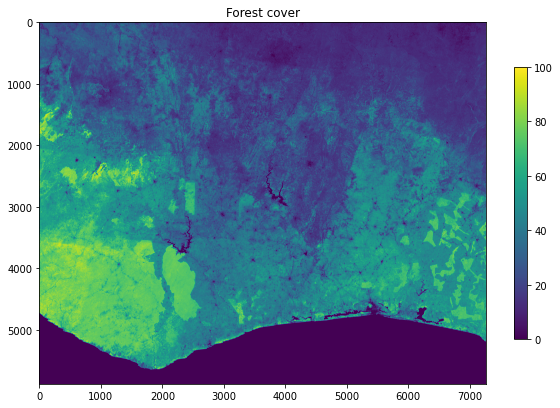

In [33]:
import scipy
import scipy.ndimage
%pylab inline

imshow(raster)
title('Forest cover')
gcf().set_size_inches(10,10)
colorbar(shrink=0.5)

### Exercise

- Write a function which which takes a raster file as input and returns informations about:
    - Driver
    - Height, Width
    - Number of Bands
    - Number of pixels
    - Pixel Size (Resoultion)
    - CRS
    - Data type
    - Coordinates of the bounding box
    - Min, Max, Mean 
- Plot a histrogram showing the distribution of cover values

### Mosaicing

<img src="images/mosaic.png" width=400  />

First of all we need the different raster files we need for our mosaic

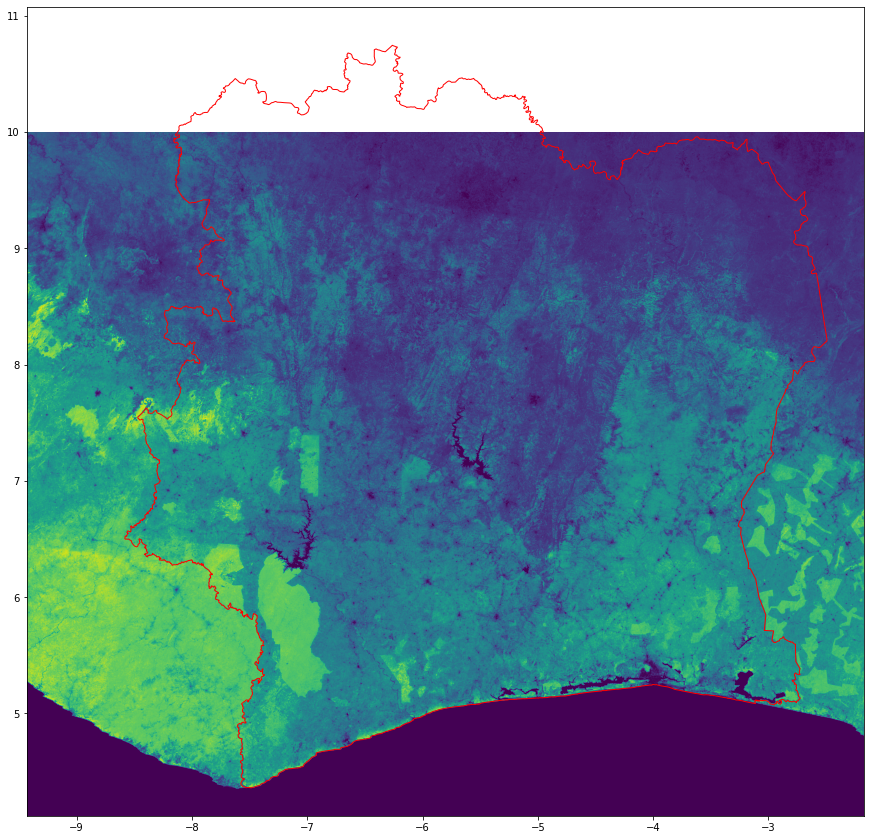

In [39]:
import matplotlib.pyplot as plt
from rasterio.plot import show
import geopandas as gpd

civ = gpd.read_file('Data/vector/civ.shp')
raster = rasterio.open("Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif")


fig, ax = plt.subplots(figsize=(15, 15))
show(raster.read(1),transform=raster.transform, ax=ax)
civ.plot(ax=ax, facecolor='none', edgecolor='r');
plt.show()

In [40]:
import os
import glob

search_criteria = "Data/raster/forest/Hansen_GFC2015_treecover2000*.tif"
q = os.path.join(".", search_criteria)

raster_list = glob.glob(q)
raster_list

['./Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif',
 './Data/raster/forest/Hansen_GFC2015_treecover2000_20N_010W_clip.tif']

Now we can import all this files with rasterio

In [41]:
src_files_to_mosaic = []

for fp in raster_list:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    
src_files_to_mosaic   

[<open DatasetReader name='./Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif' mode='r'>,
 <open DatasetReader name='./Data/raster/forest/Hansen_GFC2015_treecover2000_20N_010W_clip.tif' mode='r'>]

..and merge them 

In [44]:
from rasterio.merge import merge
    
dest, output_transform=merge(src_files_to_mosaic, nodata = 0, precision=7)
dest
with rasterio.open("Data/raster/forest/Hansen_GFC2015_treecover2000_10N_010W_clip.tif") as src:
        out_meta = src.meta.copy()    

        out_meta.update({"driver": "GTiff",
                 "height": dest.shape[1],
                 "width": dest.shape[2],
                 "transform": output_transform})

with rasterio.open("Data/raster/forest/tree_cover_mosaic.tif", "w", **out_meta) as dest1:
        dest1.write(dest)

In [45]:
with rasterio.open('Data/raster/forest/tree_cover_mosaic.tif') as src:
    mosaic = src.read(1)
    

Populating the interactive namespace from numpy and matplotlib


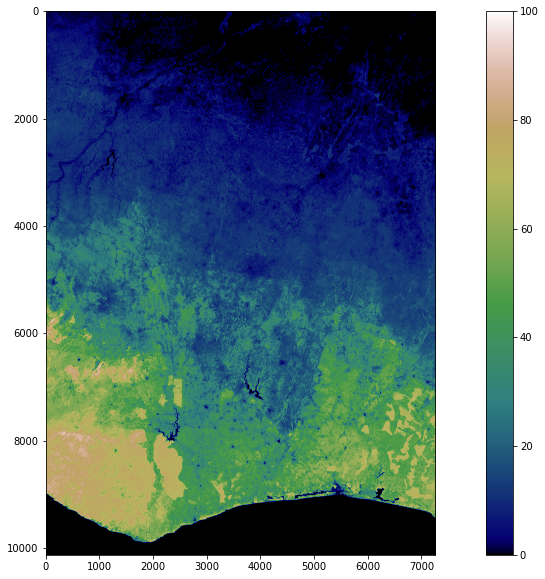

In [22]:
# Plot the dem using raster.io
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(mosaic) 
cbar = plt.colorbar(); plt.set_cmap('gist_earth'); 


### Masking / clipping raster

<img src="images/clip.png" width=600  />

In [22]:
import rasterio
from rasterio import mask
from rasterio import plot
from shapely.geometry import box
import geopandas as gpd
import os
from fiona.crs import from_epsg
%matplotlib inline


raster = rasterio.open("Data/raster/forest/tree_cover_mosaic.tif")
outraster = "Data/raster/forest/tree_cover_mosaic_clip.tif"

Next we create a bounding box around the desired region and clip the raster based on that.

In [23]:
civ = gpd.read_file('Data/vector/civ.shp')

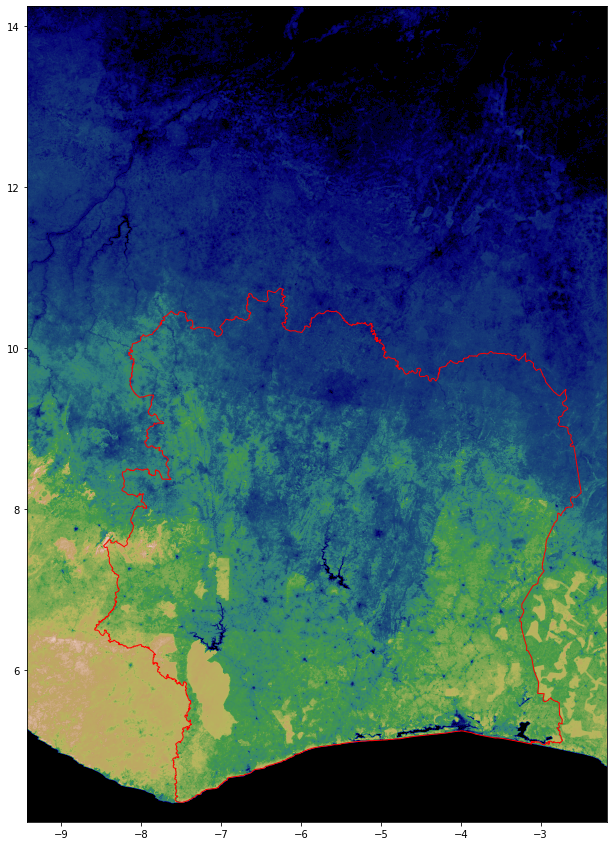

In [47]:
import matplotlib.pyplot as plt
from rasterio.plot import show

fig, ax = plt.subplots(figsize=(15, 15))
show(raster.read(1),transform=raster.transform, ax=ax)
civ.plot(ax=ax, facecolor='none', edgecolor='r');
plt.show()

Now we need to get the coordinates in such a format that rasterio understands them. Therefor we use a function to convert the geometry into json format

In [48]:
import json

def extract_features(geodataframe):
    return [json.loads(geodataframe.to_json())['features'][0]['geometry']]

coords = extract_features(civ)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[-2.7400921949999315, 5.408293436000065], [-2.7395177269999635, 5.407330877000049], [-2.727411457999949, 5.387044641000045], [-2.7332038329999477, 5.35122055100004], [-2.726351349999959, 5.335294128000044], [-2.7537872849999303, 5.337839298000063], [-2.764613370999939, 5.348337989000072], [-2.7714750549999394, 5.342550853000034], [-2.7747263929999804, 5.336761757000033], [-2.775810771999943, 5.333143004000021], [-2.7736478339999735, 5.324456479000048], [-2.770401387999925, 5.317218109000066], [-2.7667951169999583, 5.308531023000057], [-2.7653541039999254, 5.3005690250000725], [-2.7675225409999484, 5.294055258000071], [-2.771494665999967, 5.289352571000052], [-2.776549490999969, 5.286821401000054], [-2.7870187749999786, 5.285377081000036], [-2.79423929099994, 5.282484642000043], [-2.7920746739999345, 5.278502902000071], [-2.78954787899994, 5.2781401920000235], [-2.7841354689999775, 5.271986162000076], [-2.779082713999969, 5.269088949000036], [-2.771

Clipping the raster can be done with the mask function. Be sure you specifying clip=True.

In [53]:
# Clip the raster with Polygon
out_img, out_transform = mask.mask(dataset=raster, shapes=coords, crop=True)

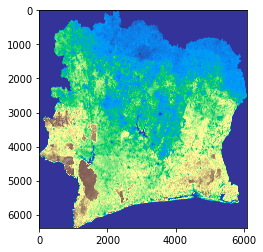

In [54]:
plot.show(out_img, cmap='terrain')

Don't forget to update the metadata

In [55]:
# Copy the metadata
out_meta = raster.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7260, 'height': 10123, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.001, 0.0, -9.432,
       0.0, -0.0009999574829931972, 14.24225)}


In [56]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": raster.crs}
                         )

Now we can export our raster data

In [57]:
with rasterio.open(outraster, "w", **out_meta) as dest:
        dest.write(out_img)

## Reprojection

<img src="images/reprojection-process-2.png"  width=500/>

<right>
<sub><sup>
Source: http://132.72.155.230:3838/r/geometric-operations-with-rasters.html
</sup></sub>
<right>

In [35]:
import rasterio
raster = rasterio.open("Data/raster/forest/tree_cover_mosaic_clip.tif")
raster.crs

CRS.from_epsg(4326)

In [36]:
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'ESRI:102022' # CRS for web mercator 

path = 'Data/raster/forest/tree_cover_mosaic_clip.tif'
out_path = 'Data/raster/forest/tree_cover_mosaic_clip_reprojected.tif'

with rasterio.open(path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(out_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


CRSError: The WKT could not be parsed. OGR Error code 5

### Resampling


<img src="images/resampling.png" width=600  />

<img src="images/raster_resampling.png"  width=700/>

<right>
<sub><sup>
Source: http://132.72.155.230:3838/r/geometric-operations-with-rasters.html
</sup></sub>
<right>

In [9]:
import rioxarray
import xarray

path = "Data/raster/forest/tree_cover_mosaic_clip_reprojected.tif"
rds = xarray.open_rasterio(path).squeeze().drop("band")
rds.attrs.pop("nodatavals")

print(rds)
print('Resampling')

downsampled = rds.rio.reproject(rds.rio.crs, resolution=500)
downsampled.rio.to_raster("Data/raster/forest/tree_cover_mosaic_clip_reprojected_down.tif")

<xarray.DataArray (y: 6415, x: 6064)>
[38900560 values with dtype=uint8]
Coordinates:
  * y        (y) float64 1.203e+06 1.203e+06 1.203e+06 ... 4.859e+05 4.858e+05
  * x        (x) float64 -9.556e+05 -9.555e+05 ... -2.775e+05 -2.774e+05
Attributes:
    transform:      (111.8597975666698, 0.0, -955677.8284602538, 0.0, -111.85...
    crs:            +init=epsg:3857
    res:            (111.8597975666698, 111.8597975666698)
    is_tiled:       0
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
Resampling


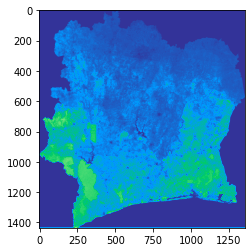

In [10]:
import rasterio as rio
from rasterio import plot

with rio.open("Data/raster/forest/tree_cover_mosaic_clip_reprojected_down.tif", "r") as src:
       bin_cover = src.read(1)
        
plot.show(bin_cover, cmap='terrain')

Populating the interactive namespace from numpy and matplotlib


/home/sth02bh/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


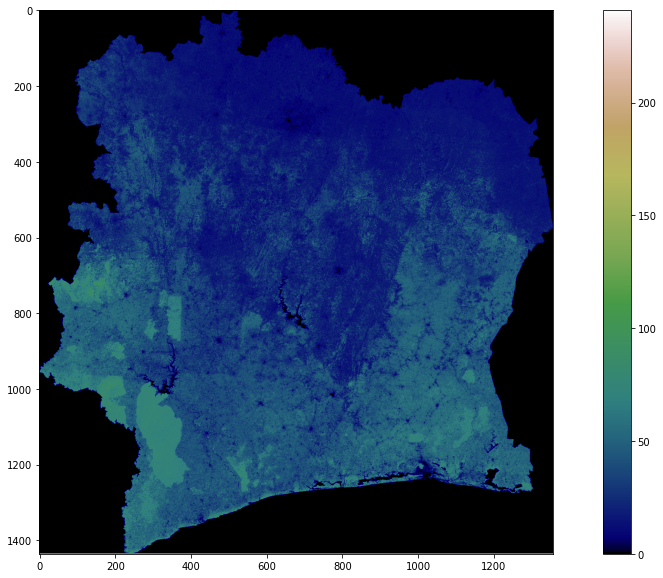

In [11]:
# Plot the dem using raster.io
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(bin_cover) 
cbar = plt.colorbar(); plt.set_cmap('gist_earth'); 

### Band math (Forest cover)

In [17]:
import rasterio
import numpy as np
with rasterio.open('Data/raster/forest/tree_cover_mosaic_clip_reprojected_down.tif') as src:
    meta = src.meta.copy()
    resolution = src.res
    forestcover_rep = src.read(1)

resolution[0] * resolution[1]  

250000.0

In [19]:
cover = ((forestcover_rep/100) * (resolution[0] * resolution[1])).sum()/ 1000000
cover

107825.6675

In [24]:
perc_cover = cover/(civ.to_crs('EPSG:3857').area / 1000000) *100
perc_cover

0    32.702539
dtype: float64

###  Binary map

Populating the interactive namespace from numpy and matplotlib


/home/sth02bh/.local/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plot', 'box']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


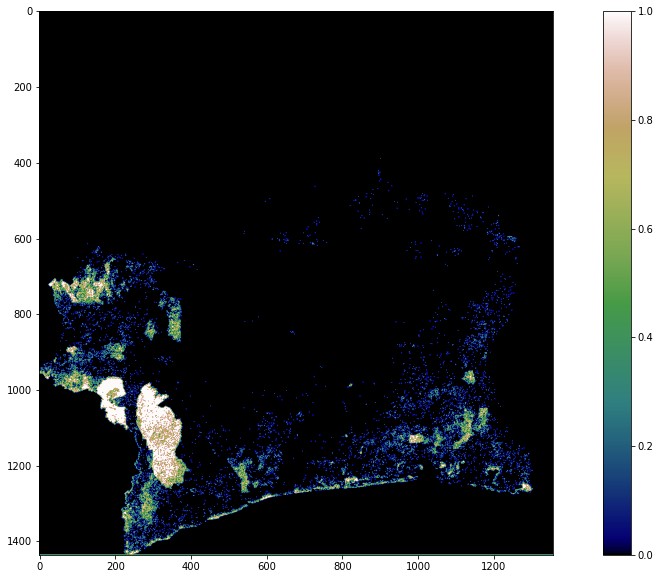

In [26]:
thresh = 70

cover70 = np.where(forestcover_rep > thresh, 1, 0)


# Plot the dem using raster.io
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(cover70) 
cbar = plt.colorbar(); plt.set_cmap('gist_earth'); 

In [27]:
with rasterio.open("Data/raster/forest/tree_cover_bin.tif", "w", **meta) as dest1:
        dest1.write(cover70.astype('uint8'), 1)

### Polygonize

In [28]:
import gdal
import ogr
raster = gdal.Open("Data/raster/forest/tree_cover_bin.tif")
band = raster.GetRasterBand(1)
drv = ogr.GetDriverByName('ESRI Shapefile')
outfile = drv.CreateDataSource('Data/vector/polygonizedForestcover.shp') 
outlayer = outfile.CreateLayer('polygonized raster', srs = None )
newField = ogr.FieldDefn('DN', ogr.OFTReal)
outlayer.CreateField(newField)
gdal.Polygonize(band, None, outlayer, 0, [])
outfile = None

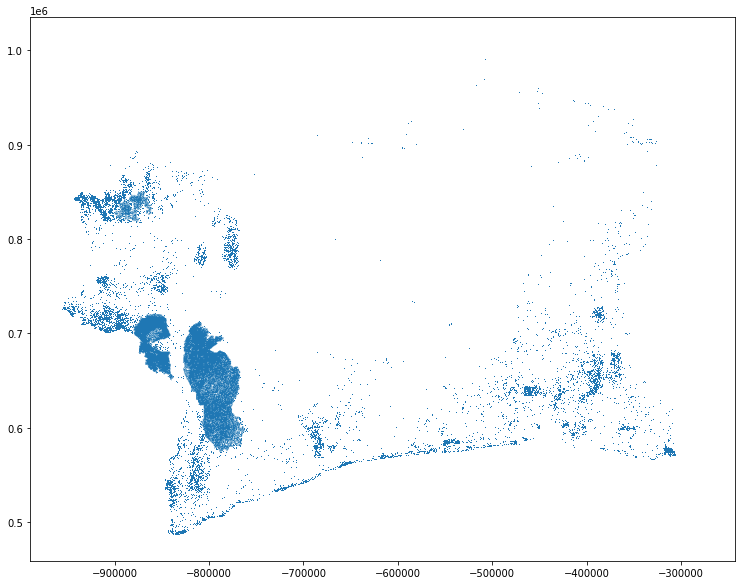

In [29]:
fcover = gpd.read_file('Data/vector/polygonizedForestcover.shp')
forest = fcover[fcover['DN'] == 1.0]
forest.plot()

## Extract raster values 

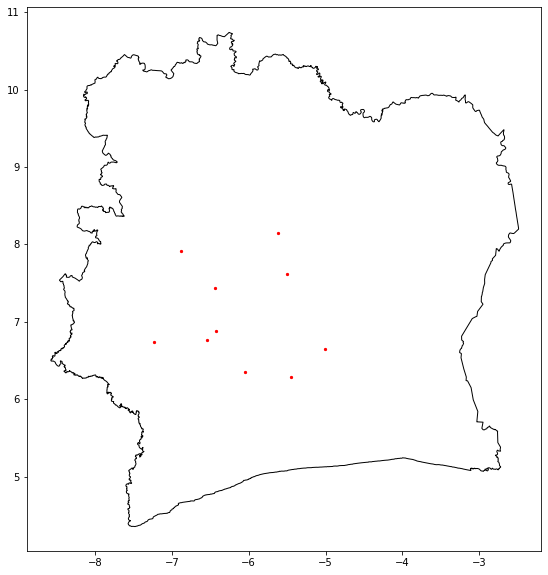

In [30]:
civ = gpd.read_file('Data/vector/civ.shp')
samples = gpd.read_file('Data/vector/sample_points.shp')
base = civ.plot(color='white', edgecolor='black')
samples.plot(ax=base, marker='o', color='red', markersize=5)

In [31]:
import rasterstats

samples_rep = samples.to_crs('EPSG:3857')

point_values = rasterstats.point_query(samples_rep.geometry, "Data/raster/forest/tree_cover_mosaic_clip_reprojected_down.tif")
point_values

[36.81799786301501,
 38.71155798030978,
 33.32040078321663,
 13.924875832633756,
 23.707378852084833,
 34.645189693578864,
 29.93854573775443,
 26.225763735020195,
 38.63134132351122,
 20.266869886652486]

## Zonal statistics

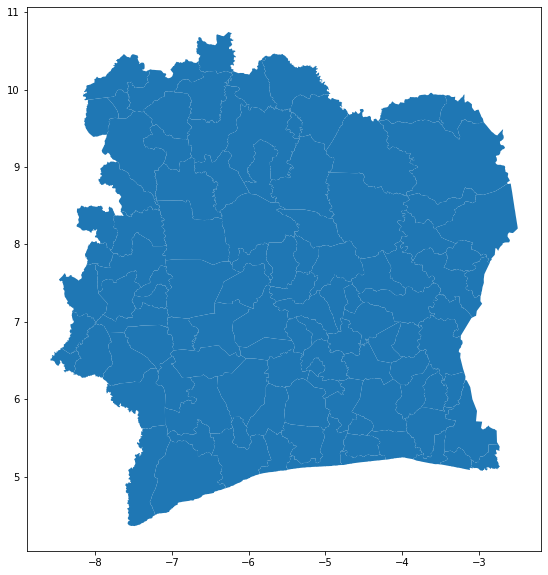

In [32]:
civ_regions = gpd.read_file('Data/vector/civ_regions.shp')
civ_regions.plot()

In [33]:
civ_regions_rep = civ_regions.to_crs('EPSG:3857')

rasterstats.zonal_stats(civ_regions_rep.geometry, "Data/raster/forest/tree_cover_mosaic_clip_reprojected_down.tif", stats=['min', 'mean', 'max'])

[{'min': 0.0, 'max': 100.0, 'mean': 45.179699890203736},
 {'min': 0.0, 'max': 100.0, 'mean': 34.89425842825912},
 {'min': 0.0, 'max': 100.0, 'mean': 48.66324150188847},
 {'min': 0.0, 'max': 100.0, 'mean': 27.65964024732996},
 {'min': 0.0, 'max': 93.0, 'mean': 53.67282321899736},
 {'min': 0.0, 'max': 99.0, 'mean': 52.58165859564165},
 {'min': 0.0, 'max': 100.0, 'mean': 42.11129363449692},
 {'min': 0.0, 'max': 100.0, 'mean': 49.95920745920746},
 {'min': 0.0, 'max': 99.0, 'mean': 58.055827535858455},
 {'min': 0.0, 'max': 99.0, 'mean': 45.69771137952956},
 {'min': 0.0, 'max': 59.0, 'mean': 22.22039072039072},
 {'min': 0.0, 'max': 100.0, 'mean': 45.80557707203718},
 {'min': 0.0, 'max': 90.0, 'mean': 22.184673366834172},
 {'min': 0.0, 'max': 99.0, 'mean': 53.20496894409938},
 {'min': 0.0, 'max': 100.0, 'mean': 46.24624530663329},
 {'min': 0.0, 'max': 100.0, 'mean': 57.5093162603628},
 {'min': 0.0, 'max': 71.0, 'mean': 34.78284724227549},
 {'min': 0.0, 'max': 99.0, 'mean': 25.494890613477544}

### Exercise

In the folder /Data/raster/forest you find 2 datasets called Hansen_GFC2015_lossyear_20N_010W.tif and Hansen_GFC2015_lossyear_10N_010W.tif. 

This datasets includes the year of gross forest cover loss event. A disaggregation of total forest loss to annual time scales. Encoded as either 0 (no loss) or else a value in the range 1–14, representing loss detected primarily in the year 2001–2014, respectively. 

- Import the datasets and inspect the the values
- Mosaic the 2 datasets and clip the result to the boundary of Côte d'Ivoire
- Visualize the forest loss for the year 2010
- Calculate the forest cover for the whole country for the years 2005, 2010 and 2014 (Hint: Use the treecover 2000 dataset as baseline)
